In [ ]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded1 = drive.CreateFile({'id':"1UVyGVSHAbRuuoFkIGxgFrfaEEw64vJRM"})   # replace the id with id of file you want to access
downloaded2 = drive.CreateFile({'id':"17b4wCUsEZjRJLhZ2Tv10mongpecIvF9B"})
downloaded1.GetContentFile('two_Microchip_Tests.txt')        # replace the file name with your file
downloaded2.GetContentFile('two_Exam_Tests.txt')        # replace the file name with your file

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import random;
import numpy as np;

In [ ]:
#Two different datasets are avaialble for testing in this notebook. You may activate any one of the following two lines to use one or the other data set. 
C = pd.read_csv('two_Exam_Tests.txt', names = ['Exam1', 'Exam2', 'Result'])
#C = pd.read_csv('two_Microchip_Tests.txt', names = ['Exam1', 'Exam2', 'Result'])
C

,Exam1,Exam2,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


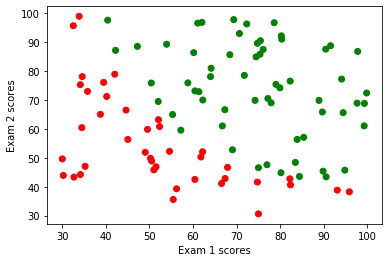

In [ ]:
def plot_Exam_Data(normalize):
  Color_Arr = ['g']*C.shape[0];
  for i in range(0,C.shape[0]):
    if(C.Result[i] ==0): Color_Arr[i] ='r';
  if(normalize ==0):
    plt.scatter(C.Exam1, C.Exam2, c = Color_Arr)
  else:
    plt.scatter(X1, X2, c = Color_Arr)
  plt.xlabel('Exam 1 scores');
  plt.ylabel('Exam 2 scores');

plot_Exam_Data(0)

In [ ]:
X1 = (C.Exam1-np.mean(C.Exam1))/np.std(C.Exam1);
X2 = (C.Exam2-np.mean(C.Exam2))/np.std(C.Exam2);
Y = C.Result;

a0 = random.uniform(-1,1);
a1 = random.uniform(-1,1);
a2 = random.uniform(-1,1);

learning_Rate = 0.01;

30.28671076822607

In [ ]:
#Perceptron algorithm
for i in range(0,1000):
  Ri = random.randint(0,C.shape[0]-1);
  y_side = a0+ a1*X1[Ri] +a2*X2[Ri];
  if (y_side >0 and Y[Ri] ==0):
    a1 = a1-learning_Rate*X1[Ri];
    a2 = a2 - learning_Rate*X2[Ri];
    a0 = a0 - learning_Rate;
  elif(y_side<0 and Y[Ri] ==1):
    a1 = a1+learning_Rate*X1[Ri];
    a2 = a2 + learning_Rate*X2[Ri];
    a0 = a0 + learning_Rate;
  print([a0, a1, a2])

[-0.5175988698712406, 0.7799277373707151, -0.7672187678991678]
[-0.5075988698712406, 0.79652184154677, -0.7561283253359703]
[-0.5175988698712406, 0.7809142954600187, -0.7409864801806869]
[-0.5275988698712406, 0.7722759243380695, -0.7271388612310403]
[-0.5175988698712406, 0.7748673796785652, -0.7126955588959862]
[-0.5175988698712406, 0.7748673796785652, -0.7126955588959862]
[-0.5075988698712406, 0.7808324371376317, -0.7104044364589817]
[-0.4975988698712406, 0.7842942049292447, -0.6941761043197894]
[-0.4975988698712406, 0.7842942049292447, -0.6941761043197894]
[-0.48759886987124057, 0.7825518801670228, -0.6921574275146557]
[-0.47759886987124056, 0.7730584126977118, -0.6801215673690284]
[-0.46759886987124055, 0.7609810656518172, -0.6688277521613258]
[-0.46759886987124055, 0.7609810656518172, -0.6688277521613258]
[-0.47759886987124056, 0.7524160866473035, -0.656116782637823]
[-0.47759886987124056, 0.7524160866473035, -0.656116782637823]
[-0.48759886987124057, 0.7476926080652142, -0.6427857

In [ ]:
def sigmoid(x):
  z = 1/(1 + np.exp(-x))
  return z;

In [ ]:
def plot_Sigmoid_Surface(theta0,theta1, theta2, X1, X2):
  grid_X1 = np.arange(np.amin(X1), np.amax(X1),0.1);
  grid_X2 = np.arange(np.amin(X2), np.amax(X2),0.1);
  H = np.zeros([grid_X2.shape[0], grid_X1.shape[0]]);
  for i in range(0, grid_X2.shape[0]):
    for j in range(0,grid_X1.shape[0]):
      H[i,j] = sigmoid(theta0+theta1*grid_X1[j]+theta2*grid_X2[i])
  plt.contour(grid_X1, grid_X2, H, levels = [0.5]);

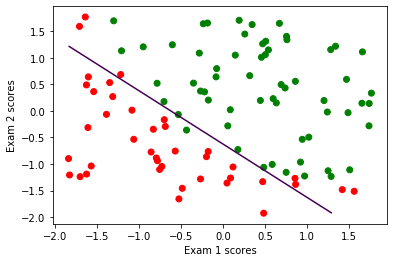

In [ ]:
plt.figure()
plot_Exam_Data(1)
plt.plot(X1, -(1/a2)*(a0+ a1*X1), 'k')
#plot_Sigmoid_Surface(a0,a1, a2, X1, X2)

In [ ]:
X1 = (C.Exam1-np.mean(C.Exam1))/np.std(C.Exam1);
X2 = (C.Exam2-np.mean(C.Exam2))/np.std(C.Exam2);
Y = C.Result;

a0 = random.uniform(-1,1);
a1 = random.uniform(-1,1);
a2 = random.uniform(-1,1);

learning_Rate = 0.1;
expanding_Rate = 0.99;

In [ ]:
#SVM algorithm
for i in range(0,1000):
  Ri = random.randint(0,C.shape[0]-1);
  y_side1 = a0+ a1*X1[Ri] +a2*X2[Ri]-1;
  y_side2 = a0+ a1*X1[Ri] +a2*X2[Ri]+1;
  if (y_side2 >0 and Y[Ri] ==0):
    a1 = a1-learning_Rate*X1[Ri];
    a2 = a2 - learning_Rate*X2[Ri];
    a0 = a0 - learning_Rate;
  elif(y_side1<0 and Y[Ri] ==1):
    a1 = a1+learning_Rate*X1[Ri];
    a2 = a2 + learning_Rate*X2[Ri];
    a0 = a0 + learning_Rate;
  a0 = 0.99*a0;
  a1 = 0.99*a1;
  a2 = 0.99*a2;

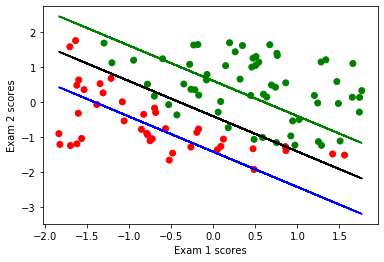

In [ ]:
plt.figure()
plot_Exam_Data(1)
plt.plot(X1, (1/a2)*(1-a0- a1*X1), 'g')
plt.plot(X1, (1/a2)*(-a0- a1*X1), 'k')
plt.plot(X1, (1/a2)*(-1-a0- a1*X1), 'b')